<a href="https://colab.research.google.com/github/fakhrifauzan/RecognitionSystem_Assignment3/blob/master/Assignment%203%20-%20Fakhri%20Fauzan%20(1301154374).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Recognition System

Fakhri Fauzan - 1301154374

ICM - 39 - GAB

Example Code Official from Scikit-Images :
1. [Local Binary Pattern](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html)
2. [Histogram of Oriented Gradients](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

from skimage.feature import hog, local_binary_pattern
from scipy.stats import itemfreq
from sklearn.model_selection import train_test_split
import cv2
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip 'gdrive/My Drive/_TELKOM UNIVERSITY_/_SEMESTER 7/SISREK/fruit.zip'

Archive:  gdrive/My Drive/_TELKOM UNIVERSITY_/_SEMESTER 7/SISREK/fruit.zip
replace rgb/apple_1/apple_1_1_100_crop.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Dataset

In [0]:
# settings for LBP
radius = 7
n_points = 8 * radius
eps=1e-7

def load_data(a, b, c, d, fruit_name, img_fruit, img_fruit_gray, x_fruit, x_fruit_lbp, y_fruit):
  for i in range(1,a):
    # Read Image
    img_fruit = cv2.imread('rgb/'+ str(fruit_name) +'_'+ str(d) +'/'+ str(fruit_name) +'_'+ str(d) +'_1_'+ str(i) +'_crop.png')
    
    # Convert to Grayscale
    img_fruit = cv2.resize(img_fruit,(80,80))
    img_fruit_rgb = cv2.cvtColor(img_fruit, cv2.COLOR_BGR2RGB)
    img_fruit_gray = cv2.cvtColor(img_fruit_rgb, cv2.COLOR_RGB2GRAY)
    
    # Calc Histogram Of Gradient
    value, hog_image = hog(img_fruit_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True)
    
    # Calc Local Binary Pattern
    lbp = local_binary_pattern(img_fruit_gray, n_points, radius, method='default')
    
    # To calculate a normalized histogram 
    (hist, _) = np.histogram(lbp.flatten(),	bins=np.arange(0, n_points+3), range=(0, n_points+2))
    
		# normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    
    x_fruit.append(value)
    x_fruit_lbp.append(hist)
    y_fruit.append(str(fruit_name))

  for i in range(1,b):
    # Read Image
    img_fruit = cv2.imread('rgb/'+ str(fruit_name) +'_'+ str(d) +'/'+ str(fruit_name) +'_'+ str(d) +'_2_'+ str(i) +'_crop.png')
    
    # Convert to Grayscale
    img_fruit = cv2.resize(img_fruit,(80,80))
    img_fruit_rgb = cv2.cvtColor(img_fruit, cv2.COLOR_BGR2RGB)
    img_fruit_gray = cv2.cvtColor(img_fruit_rgb, cv2.COLOR_RGB2GRAY)
    
    # Calc Histogram Of Gradient
    value, hog_image = hog(img_fruit_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True)
    
    # Calc Local Binary Pattern
    lbp = local_binary_pattern(img_fruit_gray, n_points, radius, method='default')
    
    
    # To calculate a normalized histogram 
    (hist, _) = np.histogram(lbp.flatten(),	bins=np.arange(0, n_points+3), range=(0, n_points+2))
    
		# normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    
    x_fruit.append(value)
    x_fruit_lbp.append(hist)
    y_fruit.append(str(fruit_name))

  for i in range(1,c):
    # Read Image
    img_fruit = cv2.imread('rgb/'+ str(fruit_name) +'_'+ str(d) +'/'+ str(fruit_name) +'_'+ str(d) +'_4_'+ str(i) +'_crop.png')
    
    # Convert to Grayscale
    img_fruit = cv2.resize(img_fruit,(80,80))
    img_fruit_rgb = cv2.cvtColor(img_fruit, cv2.COLOR_BGR2RGB)
    img_fruit_gray = cv2.cvtColor(img_fruit_rgb, cv2.COLOR_RGB2GRAY)
    
    # Calc Histogram Of Gradient
    value, hog_image = hog(img_fruit_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True)
    
    # Calc Local Binary Pattern
    lbp = local_binary_pattern(img_fruit_gray, n_points, radius, method='default')
    
    # To calculate a normalized histogram 
    (hist, _) = np.histogram(lbp.flatten(),	bins=np.arange(0, n_points+3), range=(0, n_points+2))
    
		# normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    
    x_fruit.append(value)
    x_fruit_lbp.append(hist)
    y_fruit.append(str(fruit_name))
    
  print("Berhasil Load Data " + fruit_name + "_" + str(d))

Example of Dataset


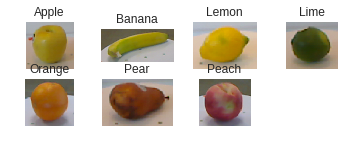

In [0]:
import matplotlib.pyplot as plt

print('Example of Dataset')
fig = plt.figure()
ax1 = fig.add_subplot(4,4,1)
ax1.set_title('Apple')
ax1.set_axis_off()
img_old = cv2.imread('rgb/apple_3/apple_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax1.imshow(img)

ax2 = fig.add_subplot(4,4,2)
ax2.set_title('Banana')
ax2.set_axis_off()
img_old = cv2.imread('rgb/banana_3/banana_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax2.imshow(img)

ax3 = fig.add_subplot(4,4,3)
ax3.set_title('Lemon')
ax3.set_axis_off()
img_old = cv2.imread('rgb/lemon_3/lemon_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax3.imshow(img)

ax4 = fig.add_subplot(4,4,4)
ax4.set_title('Lime')
ax4.set_axis_off()
img_old = cv2.imread('rgb/lime_3/lime_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax4.imshow(img)

ax5 = fig.add_subplot(4,4,5)
ax5.set_title('Orange')
ax5.set_axis_off()
img_old = cv2.imread('rgb/orange_3/orange_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax5.imshow(img)

ax6 = fig.add_subplot(4,4,6)
ax6.set_title('Pear')
ax6.set_axis_off()
img_old = cv2.imread('rgb/pear_3/pear_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax6.imshow(img)

ax7 = fig.add_subplot(4,4,7)
ax7.set_title('Peach')
ax7.set_axis_off()
img_old = cv2.imread('rgb/peach_3/peach_3_1_100_crop.png')
img = cv2.cvtColor(img_old, cv2.COLOR_BGR2RGB)
ax7.imshow(img)

### Apple

In [0]:
# Initialize apple list
x_apple, x_apple_lbp, y_apple = [], [], []

In [0]:
# Load Data Apple
load_data(208, 200, 199, 1, 'apple', 'img_apple', 'img_apple_gray', x_apple, x_apple_lbp, y_apple)
load_data(202, 214, 206, 2, 'apple', 'img_apple', 'img_apple_gray', x_apple, x_apple_lbp, y_apple)
load_data(201, 208, 198, 3, 'apple', 'img_apple', 'img_apple_gray', x_apple, x_apple_lbp, y_apple)
load_data(205, 224, 204, 4, 'apple', 'img_apple', 'img_apple_gray', x_apple, x_apple_lbp, y_apple)
load_data(209, 199, 221, 5, 'apple', 'img_apple', 'img_apple_gray', x_apple, x_apple_lbp, y_apple)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data apple_1
Berhasil Load Data apple_2
Berhasil Load Data apple_3
Berhasil Load Data apple_4
Berhasil Load Data apple_5


In [0]:
#Convert list of array to list of list
x_apple = [l.tolist() for l in x_apple]
x_apple_lbp = [l.tolist() for l in x_apple_lbp]

In [0]:
len(x_apple)

3083

### Banana

In [0]:
# Initialize banana list
x_banana, x_banana_lbp, y_banana = [], [], []

In [0]:
# Load Data Banana
load_data(213, 245, 268, 1, 'banana', 'img_banana', 'img_banana_gray', x_banana, x_banana_lbp, y_banana)
load_data(213, 237, 264, 2, 'banana', 'img_banana', 'img_banana_gray', x_banana, x_banana_lbp, y_banana)
load_data(193, 251, 255, 3, 'banana', 'img_banana', 'img_banana_gray', x_banana, x_banana_lbp, y_banana)
load_data(189, 248, 250, 4, 'banana', 'img_banana', 'img_banana_gray', x_banana, x_banana_lbp, y_banana)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data banana_1
Berhasil Load Data banana_2
Berhasil Load Data banana_3
Berhasil Load Data banana_4


In [0]:
#Convert list of array to list of list
x_banana = [l.tolist() for l in x_banana]
x_banana_lbp = [l.tolist() for l in x_banana_lbp]

In [0]:
len(x_banana)

2814

### Lemon

In [0]:
# Initialize lemon list
x_lemon, x_lemon_lbp, y_lemon = [], [], []

In [0]:
# Load Data Lemon
load_data(199, 201, 193, 1, 'lemon', 'img_lemon', 'img_lemon_gray', x_lemon, x_lemon_lbp, y_lemon)
load_data(227, 221, 218, 2, 'lemon', 'img_lemon', 'img_lemon_gray', x_lemon, x_lemon_lbp, y_lemon)
load_data(201, 195, 218, 3, 'lemon', 'img_lemon', 'img_lemon_gray', x_lemon, x_lemon_lbp, y_lemon)
load_data(186, 196, 220, 4, 'lemon', 'img_lemon', 'img_lemon_gray', x_lemon, x_lemon_lbp, y_lemon)
load_data(231, 219, 204, 5, 'lemon', 'img_lemon', 'img_lemon_gray', x_lemon, x_lemon_lbp, y_lemon)
load_data(205, 206, 207, 6, 'lemon', 'img_lemon', 'img_lemon_gray', x_lemon, x_lemon_lbp, y_lemon)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data lemon_1
Berhasil Load Data lemon_2
Berhasil Load Data lemon_3
Berhasil Load Data lemon_4
Berhasil Load Data lemon_5
Berhasil Load Data lemon_6


In [0]:
#Convert list of array to list of list
x_lemon = [l.tolist() for l in x_lemon]
x_lemon_lbp = [l.tolist() for l in x_lemon_lbp]

In [0]:
len(x_lemon)

3729

### Lime

In [0]:
# Initialize lime list
x_lime, x_lime_lbp, y_lime = [], [], []

In [0]:
# Load Data Lime
load_data(199, 228, 203, 1, 'lime', 'img_lime', 'img_lime_gray', x_lime, x_lime_lbp, y_lime)
load_data(202, 208, 230, 2, 'lime', 'img_lime', 'img_lime_gray', x_lime, x_lime_lbp, y_lime)
load_data(197, 205, 200, 3, 'lime', 'img_lime', 'img_lime_gray', x_lime, x_lime_lbp, y_lime)
load_data(188, 254, 200, 4, 'lime', 'img_lime', 'img_lime_gray', x_lime, x_lime_lbp, y_lime)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data lime_1
Berhasil Load Data lime_2
Berhasil Load Data lime_3
Berhasil Load Data lime_4


In [0]:
#Convert list of array to list of list
x_lime = [l.tolist() for l in x_lime]
x_lime_lbp = [l.tolist() for l in x_lime_lbp]

In [0]:
len(x_lime)

2502

### Orange

In [0]:
# Initialize orange list
x_orange, x_orange_lbp, y_orange = [], [], []

In [0]:
# Load Data Orange
load_data(195, 262, 253, 1, 'orange', 'img_orange', 'img_orange_gray', x_orange, x_orange_lbp, y_orange)
load_data(189, 264, 260, 2, 'orange', 'img_orange', 'img_orange_gray', x_orange, x_orange_lbp, y_orange)
load_data(193, 247, 267, 3, 'orange', 'img_orange', 'img_orange_gray', x_orange, x_orange_lbp, y_orange)
load_data(191, 254, 259, 4, 'orange', 'img_orange', 'img_orange_gray', x_orange, x_orange_lbp, y_orange)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data orange_1
Berhasil Load Data orange_2
Berhasil Load Data orange_3
Berhasil Load Data orange_4


In [0]:
#Convert list of array to list of list
x_orange = [l.tolist() for l in x_orange]
x_orange_lbp = [l.tolist() for l in x_orange_lbp]

In [0]:
len(x_orange)

2822

### Peach

In [0]:
# Initialize peach list
x_peach, x_peach_lbp, y_peach = [], [], []

In [0]:
# Load Data Peach
load_data(193, 245, 236, 1, 'peach', 'img_peach', 'img_peach_gray', x_peach, x_peach_lbp, y_peach)
load_data(194, 257, 253, 2, 'peach', 'img_peach', 'img_peach_gray', x_peach, x_peach_lbp, y_peach)
load_data(194, 250, 257, 3, 'peach', 'img_peach', 'img_peach_gray', x_peach, x_peach_lbp, y_peach)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data peach_1
Berhasil Load Data peach_2
Berhasil Load Data peach_3


In [0]:
#Convert list of array to list of list
x_peach = [l.tolist() for l in x_peach]
x_peach_lbp = [l.tolist() for l in x_peach_lbp]

In [0]:
len(x_peach)

2070

### Pear

In [0]:
# Initialize pear list
x_pear, x_pear_lbp, y_pear = [], [], []

In [0]:
# Load Data Orange
load_data(224, 220, 230, 1, 'pear', 'img_pear', 'img_pear_gray', x_pear, x_pear_lbp, y_pear)
load_data(208, 231, 230, 2, 'pear', 'img_pear', 'img_pear_gray', x_pear, x_pear_lbp, y_pear)
load_data(225, 230, 228, 3, 'pear', 'img_pear', 'img_pear_gray', x_pear, x_pear_lbp, y_pear)
load_data(212, 224, 228, 4, 'pear', 'img_pear', 'img_pear_gray', x_pear, x_pear_lbp, y_pear)
load_data(256, 245, 260, 7, 'pear', 'img_pear', 'img_pear_gray', x_pear, x_pear_lbp, y_pear)
load_data(219, 248, 268, 8, 'pear', 'img_pear', 'img_pear_gray', x_pear, x_pear_lbp, y_pear)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Berhasil Load Data pear_1
Berhasil Load Data pear_2
Berhasil Load Data pear_3
Berhasil Load Data pear_4
Berhasil Load Data pear_7
Berhasil Load Data pear_8


In [0]:
#Convert list of array to list of list
x_pear = [l.tolist() for l in x_pear]
x_pear_lbp = [l.tolist() for l in x_pear_lbp]

In [0]:
len(x_pear)

4168

## Prepare for Classification

In [0]:
import numpy as np

# Concate all Train
x_data_train = np.concatenate((x_apple, x_banana, x_lemon, x_lime, x_orange, x_peach, x_pear))
x_data_lbp_train = np.concatenate((x_apple_lbp, x_banana_lbp, x_lemon_lbp, x_lime_lbp, x_orange_lbp, x_peach_lbp, x_pear_lbp))
y_data_train = np.concatenate((y_apple, y_banana, y_lemon, y_lime, y_orange, y_peach, y_pear))

In [0]:
# Ubah label
y_data_train[y_data_train == 'apple'] = 0
y_data_train[y_data_train == 'banana'] = 1
y_data_train[y_data_train == 'lemon'] = 2
y_data_train[y_data_train == 'lime'] = 3
y_data_train[y_data_train == 'orange'] = 4
y_data_train[y_data_train == 'peach'] = 5
y_data_train[y_data_train == 'pear'] = 6

# Convert Tipe Data Array to int8
y_data_train = y_data_train.astype(np.int8)

In [0]:
print(x_data_train.shape)
print(x_data_lbp_train.shape)
print(y_data_train)

(21188, 200)
(21188, 58)
[0 0 0 ... 6 6 6]


## Classifier KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
# Lakukan Split data training dan data testing utk masing masing fitur
X_train, X_test, y_train, y_test = train_test_split(x_data_train, y_data_train, test_size=0.2, random_state=100)
X_train_lbp, X_test_lbp, y_train_lbp, y_test_lbp = train_test_split(x_data_lbp_train, y_data_train, test_size=0.2, random_state=100)

### HOG

In [0]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=7)

In [0]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='distance')

In [0]:
print(X_train.shape)
print(X_test.shape)

(16950, 200)
(4238, 200)


In [0]:
y_knn_pred = knn_clf.predict(X_test)

In [0]:
print(accuracy_score(y_test, y_knn_pred)*100,'%')

99.97640396413404 %


### LBP

In [0]:
knn_clf_lbp = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=7)

In [0]:
knn_clf_lbp.fit(X_train_lbp, y_train_lbp)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='distance')

In [0]:
print(X_train_lbp.shape)
print(X_test_lbp.shape)

(16950, 58)
(4238, 58)


In [0]:
y_knn_pred_lbp = knn_clf_lbp.predict(X_test_lbp)

In [0]:
print(accuracy_score(y_test_lbp, y_knn_pred_lbp)*100,'%')

39.1694195375177 %
